##1. Problema del negocio.
Se desea realizar inicialmente un análisis exploratorio del Dataset "Student Performance Data Set" obtenido de [Kaggle](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/data), en el cual se aborda el rendimiento de los alumnos de secudaria de dos colegios portugueses.

##2. Atributos existentes en el Data Set.
Los atributos de los datos se describen a continuación:

* **school:** colegio en el que está inscrito el alumno (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
* **sex:** Sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)
* **age:** edad del estudiante (numerico: desde los 15 hasta los 22)  
* **address:** tipo de hogar del estudiante (binario: 'U' - urbano o 'R' - rural)
* **famsize:** tañamo del nucleo familiar (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor a 3)
* **Pstatus:** estado de convivencia de los padres (binario: 'T' - viven juntos o 'A' - viven aparte)
* **Medu:** educación de la madre (numerico: 0 - ninguno, 1 - educación primaria (4to grado), 2 (5to a 9no grado), 3 (educación secundaria) o 4 (educación superior)
* **Fedu:** educación del padre (numerico: 0 - ninguno, 1 - educación primaria (4to grado), 2 (5to a 9no grado), 3 (educación secundaria) o 4 (educación superior)
* **Mjob:** Trabajo de la madre (str: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob:** Trabajo de la madre (str: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason:** Razón para elegir la escuela (str: close to 'home', school 'reputation', 'course' preference or 'other')
* *guardian:** tutor del estudiante (str: 'mother', 'father' o 'other')
* **traveltime:** tiempo de viaje de la casa a la escuela (numerico: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
* **studytime:** tiempo de estudio semanal del estudiante (numerico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
* **failures:** numero de clases pasadas no aprobadas (numerico: n si 1<=n<3, de lo contrario 4)
* **schoolsup:** soporte educativo extra al estudiante (binario: yes-no)
* **famsup:** soporte educativo de la familia (binario: yes-no)
* **paid:** clases extra pagadas dentro de la materia del curso (Matematicas o Portugues) (binario: yes-no)
* **activities:** el estudiante realiza actividades extracurriculares (binario: yes-no)
* **nursery:** el estudiante asistió a la guardería (binario: yes-no)
* **higher:** el estudiante desea realizar estudios de educación superior (binario: yes-no)
* **internet:** el estudiante tiene acceso a internet en casa (binario: yes-no)
* **romantic:** el estudiante se encuentra en una relación sentimental (binario: yes-no)
* **famrel:** calidad de las relaciones familiares (numerico: desde 1 - muy mala hasta 5 - excelente)
* **freetime:** tiempo libre del estudiante después de la escuela (numerico: desde 1 - muy poco hasta 5 - muy alto)
* **goout:** tiempo que el estudiante utiliza para salir con amigos (numerico: desde 1 - muy bajo hasta 5 - muy alto)
* **Dalc:** consumo de alcohol en días de estudio (numerico: desde 1 - muy bajo hasta 5 - muy alto)
* **Walc:** consumo de alcohol en fines de semana (numerico: desde 1 - muy bajo hasta 5 - muy alto)
* **health:** estado de salud actual del estudiante (numerico: desde 1 - muy malo hasta 5 - muy bueno)
* **absences:** numero de faltas a clase (numerico: de 0 a 93)
* **G1:** nota del estudiande en el primer periodo (numerico: de 0 a 20)
* **G2:** nota del estudiande en el segundo periodo (numerico: de 0 a 20)
* **G3:** nota final del estudiande (numerico: de 0 a 20)













##3. Lectura del Data Set

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/01. ESP AyCD/0. GitHub/Udea_EAyCD/01. FUNDAMENTOS PROG/03. PROYECTO FINAL/03. Proyecto Fund/student-por.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [3]:
print(data.shape)
data.head()

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


##4. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿Qué factores pueden influir en el rendimiento de los estudiantes de los colegios Gabriel Pereira y Mousinho da Silveira de Portugal)?

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. **Análisis univariado: relación de cada variable predictora con la variable a predecir**
3. **Análisis bivariado: relación de pares de variables predictoras con la variable a predecir**

###**4.1.** Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [4]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# Análisis de la correlación
data.corr()

<ipython-input-9-1ea26212b8a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Medu'].plot(kind='hist', bins=20, title='Medu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Fedu'].plot(kind='hist', bins=20, title='Fedu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['traveltime'].plot(kind='hist', bins=20, title='traveltime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='Medu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Medu', y='Fedu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Fedu', y='traveltime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='traveltime', y='studytime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['traveltime']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('traveltime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('traveltime')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['traveltime']
  ys = series['Medu']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('traveltime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('traveltime')
_ = plt.ylabel('Medu')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['traveltime']
  ys = series['Fedu']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('traveltime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('traveltime')
_ = plt.ylabel('Fedu')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['traveltime']
  ys = series['failures']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('traveltime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('traveltime')
_ = plt.ylabel('failures')

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Medu'].plot(kind='line', figsize=(8, 4), title='Medu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Fedu'].plot(kind='line', figsize=(8, 4), title='Fedu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['traveltime'].plot(kind='line', figsize=(8, 4), title='traveltime')
plt.gca().spines[['top', 'right']].set_visible(False)

####**4.1.1** Análisis de las variables categóricas

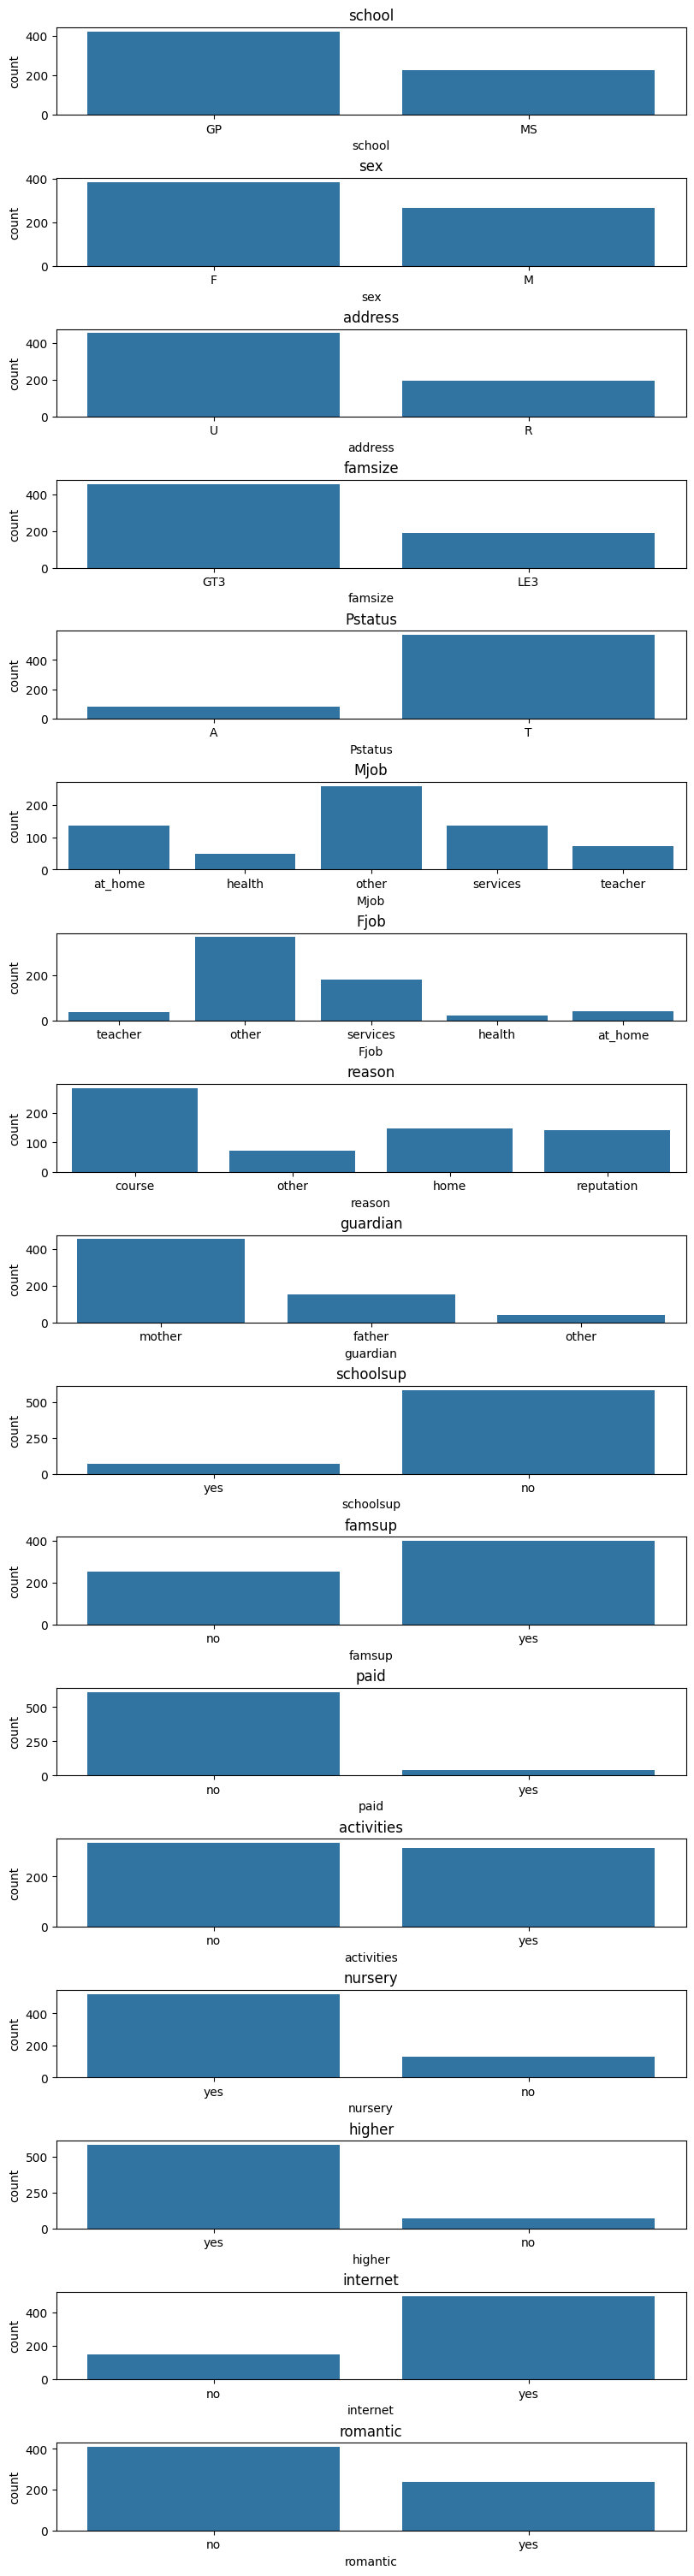

In [5]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['school', 'sex', 'address', 'famsize', 'Pstatus',
           'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
           'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1,
                       figsize=(8,30), constrained_layout = True)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

####**4.1.2** Análisis de las variables numéricas

In [6]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


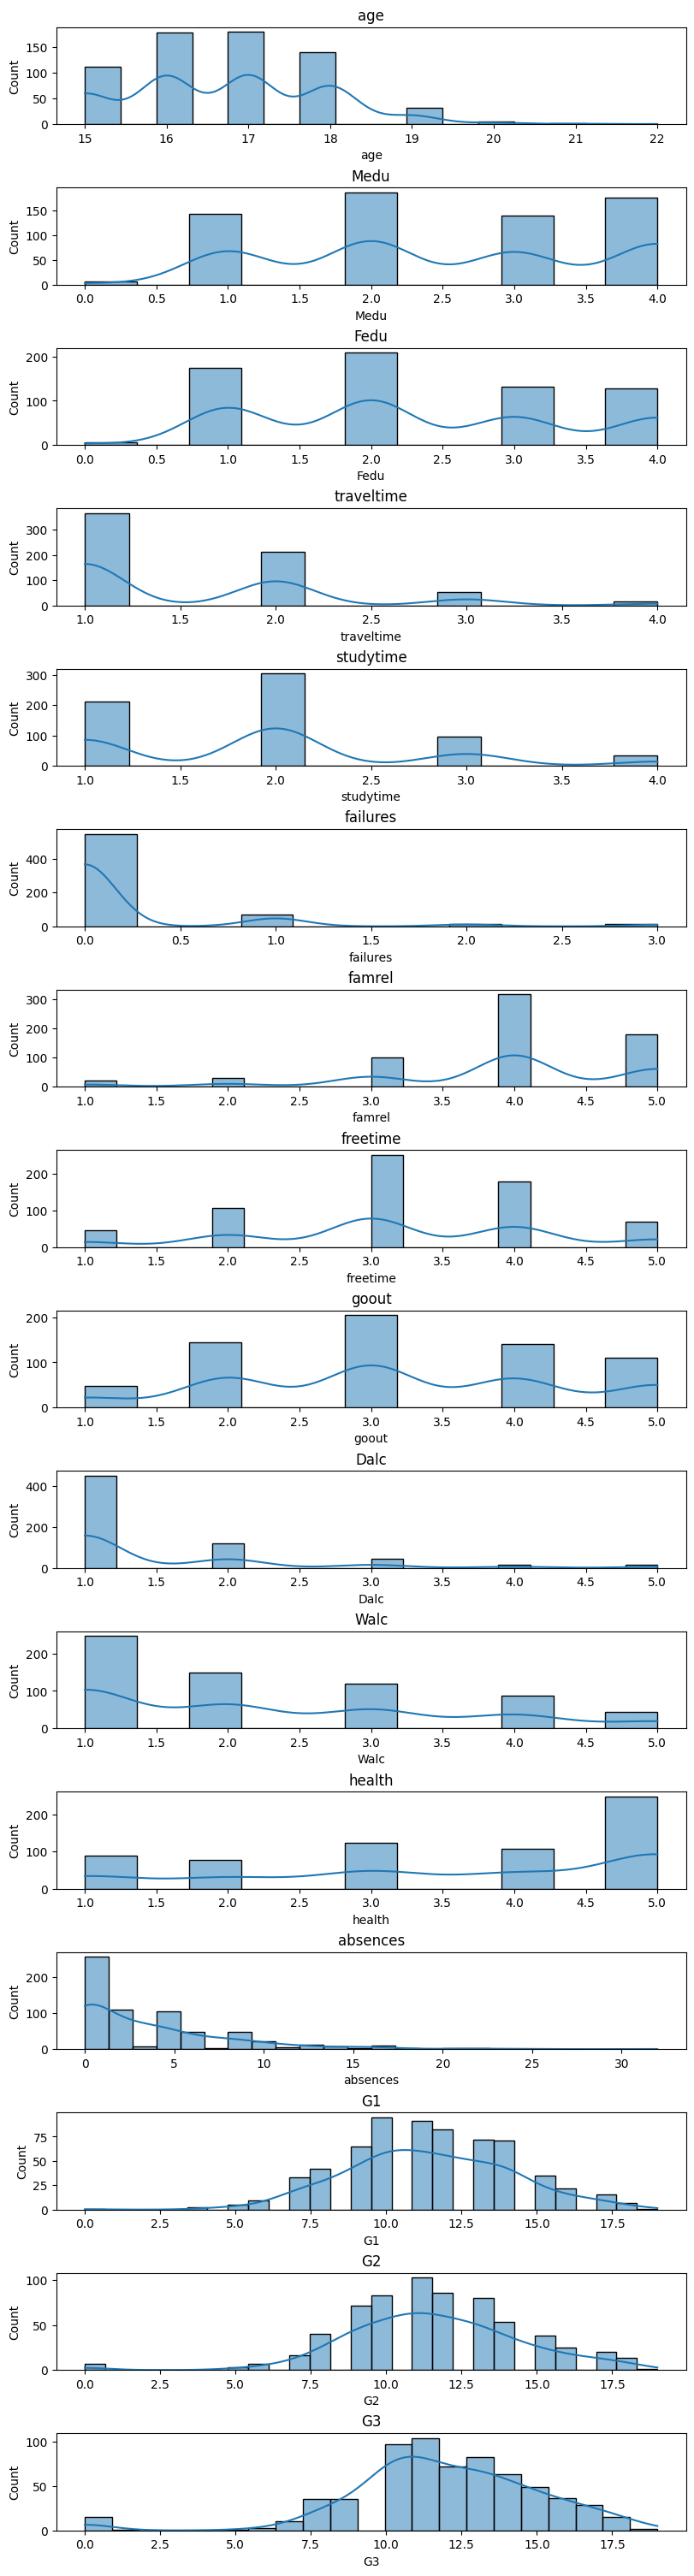

In [ ]:
# Dibujar histogramas
col_num = ['age', 'Medu', 'Fedu', 'traveltime',
           'studytime', 'failures', 'famrel', 'freetime',
           'goout', 'Dalc', 'Walc', 'health',
           'absences', 'G1', 'G2', 'G3']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_num), ncols=1,
                       figsize=(8,30), constrained_layout = True)

for i, col in enumerate(col_num):
    sns.histplot(x=col, data=data, ax=ax[i], kde = True)
    ax[i].set_title(col)

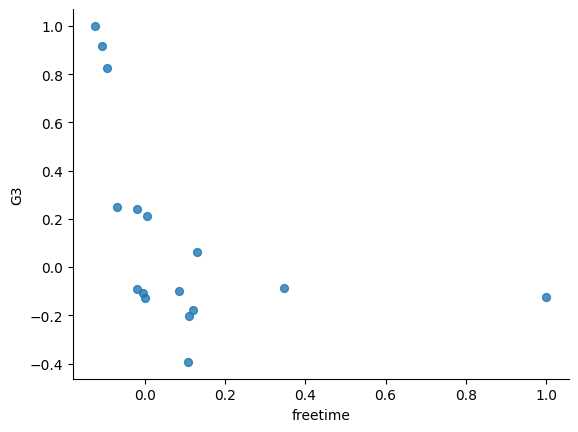

In [21]:
# Graficando la correlación
from matplotlib import pyplot as plt

_df_5.plot(kind='scatter', x='freetime', y='G3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [22]:
# Espacio de prueba para graficar correlación
X = data.G3
y = data.school

x_index = 2
y_index = 3


for i in range(len(data)):
  plt.scatter(X[y == i, x_index], X[y == i, y_index], label = data.school[i])

  plt.xlabel('longitud del pétalo')
plt.legend()
plt.ylabel('grosor del pétalo');

KeyError: 'key of type tuple not found and not a MultiIndex'